In [71]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import scipy.stats as st


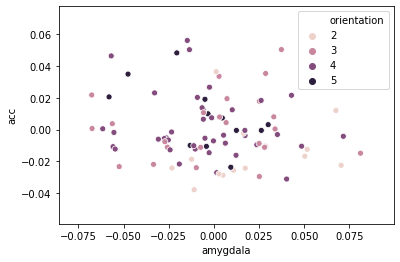

In [72]:
data = pd.read_csv("n90pol.csv")
#display(data)

sns.scatterplot(data=data, x='amygdala', y ='acc',hue="orientation")
plt.show()

The optimal choice for bandwidth h is:  0.013973984566878189 or 0.008758179725254514
the the optimal number of bins is: 17


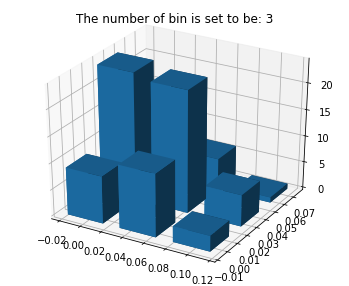

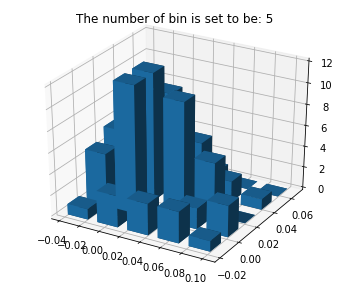

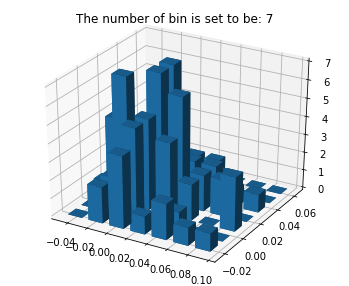

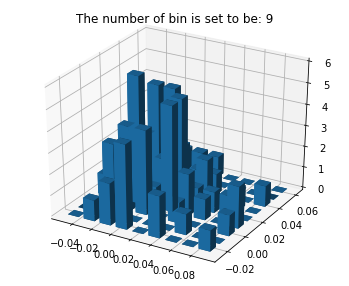

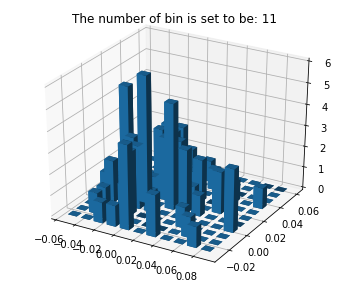

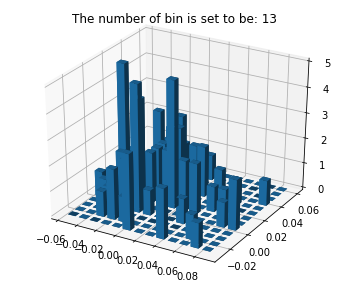

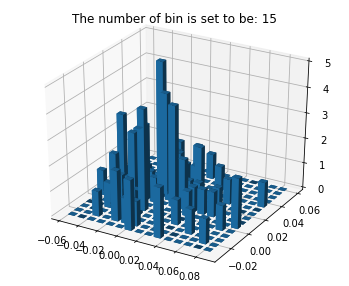

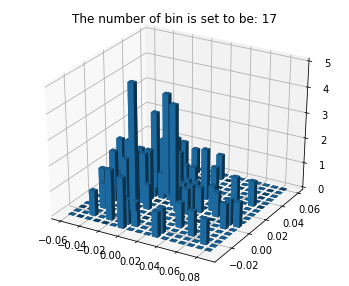

In [141]:
def Two_D_hist(data, bins=5):
    fig = plt.figure(figsize=(6,5))
    # create a 3d plot
    ax = fig.add_subplot(111, projection='3d')
    
    # get the count for each node of the x-y data with sepcified bins
    hist, xedges, yedges = np.histogram2d(data.iloc[:,0], data.iloc[:,1], bins, range=[[min(data["amygdala"]), max(data["amygdala"])], [min(data["acc"]), max(data["acc"])]])

    # make meshgrid and parameters for 3-d plot
    xpos, ypos = np.meshgrid(xedges[1:], yedges[1:])
    xpos = xpos.flatten()
    ypos = ypos.flatten()
    zpos = np.zeros_like (xpos)
    
    dx = np.abs(xedges [0]/bins*1.5)
    dy = np.abs(yedges [0]/bins*1.5)
    dz = hist.flatten()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    ax.set_title("The number of bin is set to be: "+str(bins))

    plt.show()

# Silverman’s rule of thumb
var_1 = np.var(data["amygdala"])
h_1 = 1.06*np.sqrt(var_1)*(len(data["amygdala"]))**(-0.2)

var_2 = np.var(data["acc"])
h_2 = 1.06*np.sqrt(var_2)*(len(data["acc"]))**(-0.2)

print ("The optimal choice for bandwidth h is: ", h_1,"or",h_2 )

# Thus the the optimal number of bins is: , can be calculated as follow:
bin_number = int(round((max(data["amygdala"])-min(data["amygdala"]))/h_2))
print ("the the optimal number of bins is:",bin_number )

for i in range(3,bin_number+1,2):
    Two_D_hist(data,i)

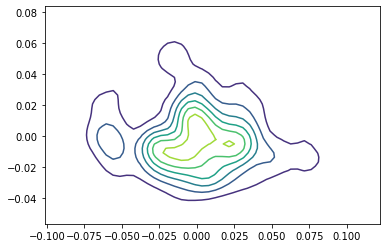

In [142]:
# functiont for gaussian_kernel
def guassian_kernel(x):
    return (1/np.sqrt(2*np.pi))*(np.e**(-(sum(x**2))/2))

# function to calcute the density of a given new data_point
def kde(x, x_all, h):
    pdf = 0
    for x_i in x_all:
        a = guassian_kernel((x_i-x)/h)/h
        pdf += a
    return pdf/len(x_all)

# get the min and max of the data
xmin = data["amygdala"].min()*1.5
xmax = data["amygdala"].max()*1.5
ymin = data["acc"].min()*1.5
ymax = data["acc"].max()*1.5

#create a meshgrid for contour plot
X, Y = np.meshgrid(np.linspace(xmin,xmax,50), np.linspace(ymin,ymax,50))
positions = np.vstack([X.ravel(), Y.ravel()])

# set the h value according to Silverman’s rule of thumb
var_2 = np.var(data["acc"])
h= 1.06*np.sqrt(var_2)*(len(data["acc"]))**(-0.2)

# get the density for each point in the meshgrid
pdf_all = []
for n in positions.T:
    pdf = kde(n, data.iloc[:,:2].values, h)
    pdf_all.append(pdf)

# reshape the density    
Z = np.reshape(pdf_all, X.shape)

#contour ploting
plt.contour(X, Y, Z)
plt.show()

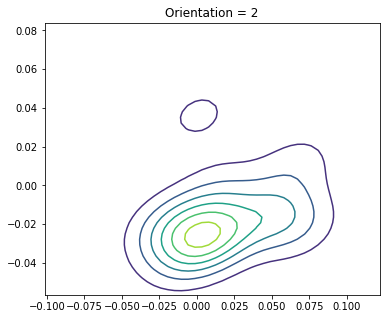

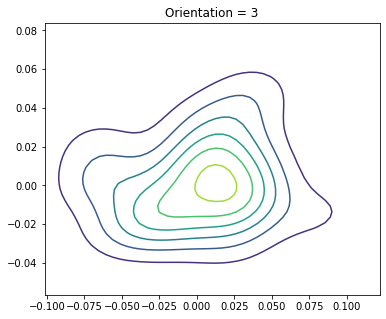

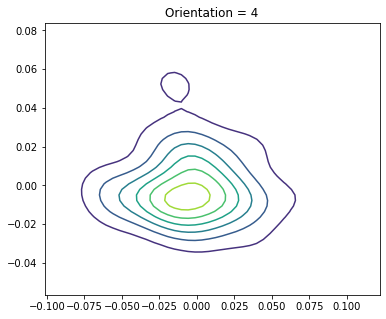

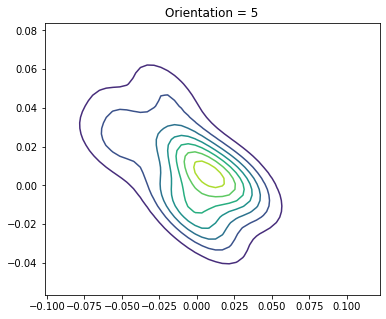

In [138]:
# try scipy.stat package for differnet orientations
import scipy.stats as st

# get the min and max of the data
xmin = data["amygdala"].min()*1.5
xmax = data["amygdala"].max()*1.5
ymin = data["acc"].min()*1.5
ymax = data["acc"].max()*1.5

# plot different orientations
for i in range(2,6):
    sup_data = data[data["orientation"]==i]
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    X, Y = np.meshgrid(np.linspace(xmin,xmax,50), np.linspace(ymin,ymax,50))
    positions = np.vstack([X.ravel(), Y.ravel()])
    kernel = st.gaussian_kde(sup_data.iloc[:,:2].T,bw_method="silverman")
    Z = np.reshape(kernel(positions), X.shape)
    ax.set_title("Orientation = "+str(i))
    plt.contour(X, Y, Z)
    plt.show()


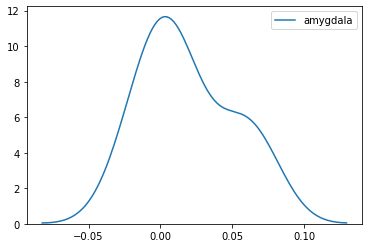

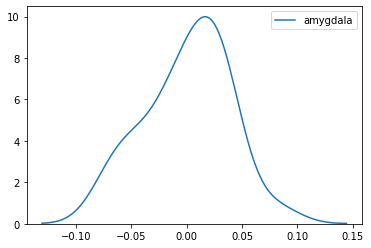

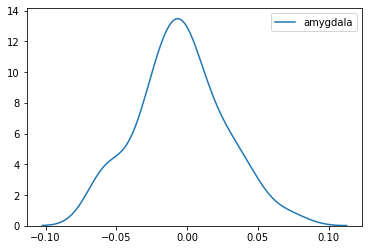

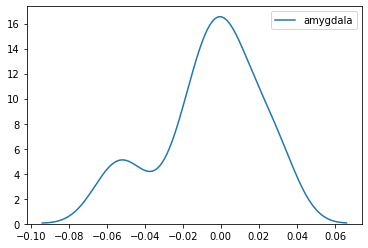

In [151]:
# simple statistics for orientation variable
(data["orientation"]).describe()

f, (ax2,ax3,ax4,ax5) = plt.subplots(4)
for i in range(2,6):
    new = data[data["orientation"]==i]["amygdala"]
    sns.kdeplot(new,ax=ax)
    plt.show()